In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from add_features import *
from models import *
sns.set(style="whitegrid")  # nice background for plots


warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)        # Afficher toutes les lignes
pd.set_option('display.max_columns', None)  



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Trier par date et heure croissante
def order_by_date(df_champs):
    df_champs = df_champs.sort_values(by='Date et heure de comptage')

# Si tu veux réinitialiser les index après le tri
    df_champs = df_champs.reset_index(drop=True)
    
    return(df_champs)

In [8]:
df_champs_ori = pd.read_csv("data\champs_elysees_2.csv", sep=";")
df_champs_ori = order_by_date(df_champs_ori)

Conversion successful!
Type: datetime64[ns]
Sample: 8747   2025-11-07 00:00:00
8748   2025-11-07 01:00:00
8749   2025-11-07 02:00:00
Name: datetime_temp, dtype: datetime64[ns]


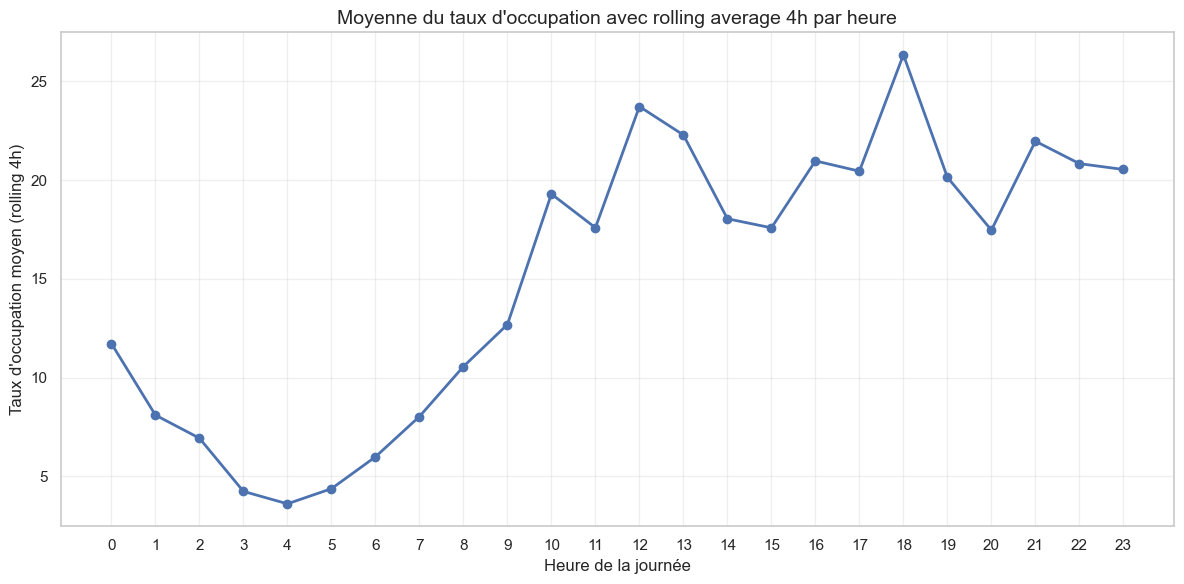

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_champs = df_champs_ori.copy()[-24:]

# Parse datetime and convert to timezone-naive
df_champs['datetime_temp'] = pd.to_datetime(df_champs['Date et heure de comptage'], utc=True)
df_champs['datetime_temp'] = df_champs['datetime_temp'].dt.tz_localize(None)

print("Conversion successful!")
print("Type:", df_champs['datetime_temp'].dtype)
print("Sample:", df_champs['datetime_temp'].head(3))

# Sort by datetime
df_champs = df_champs.sort_values('datetime_temp').reset_index(drop=True)

# Calculate 4-hour rolling average
df_champs['rolling_avg_4h'] = df_champs['Taux d\'occupation']

# Extract hour
df_champs['hour'] = df_champs['datetime_temp'].dt.hour

# Group by hour and calculate the mean of the rolling average
hourly_avg = df_champs.groupby('hour')['rolling_avg_4h'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6)
plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Taux d\'occupation moyen (rolling 4h)', fontsize=12)
plt.title('Moyenne du taux d\'occupation avec rolling average 4h par heure', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# II. A l'échelle du 7 novembre

In [19]:
df_champs

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,datetime_temp,Taux_occup_safe,vitesse_estimee,rolling_avg_vitesse_4h,hour
0,4264,AV_Champs_Elysees,2025-11-07T01:00:00+01:00,742.0,11.72056,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 00:00:00,11.72056,63.307555,63.307555,0
1,4264,AV_Champs_Elysees,2025-11-07T02:00:00+01:00,554.0,8.10000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 01:00:00,8.10000,68.395062,65.851308,1
2,4264,AV_Champs_Elysees,2025-11-07T03:00:00+01:00,529.0,6.93167,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 02:00:00,6.93167,76.316386,69.339668,2
3,4264,AV_Champs_Elysees,2025-11-07T04:00:00+01:00,344.0,4.23778,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 03:00:00,4.23778,81.174577,72.298395,3
4,4264,AV_Champs_Elysees,2025-11-07T05:00:00+01:00,296.0,3.60889,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 04:00:00,3.60889,82.019679,76.976426,4
5,4264,AV_Champs_Elysees,2025-11-07T06:00:00+01:00,354.0,4.37278,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 05:00:00,4.37278,80.955365,80.116502,5
6,4264,AV_Champs_Elysees,2025-11-07T07:00:00+01:00,546.0,5.98500,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 06:00:00,5.98500,91.228070,83.844423,6
7,4264,AV_Champs_Elysees,2025-11-07T08:00:00+01:00,716.0,8.02667,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 07:00:00,8.02667,89.202621,85.851434,7
8,4264,AV_Champs_Elysees,2025-11-07T09:00:00+01:00,923.0,10.55833,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 08:00:00,10.55833,87.419128,87.201296,8
9,4264,AV_Champs_Elysees,2025-11-07T10:00:00+01:00,900.0,12.68556,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Ouvert,1996-10-10,2023-01-01,"48.87153587897718, 2.3017227924560624","{""coordinates"": [[2.3009951475338775, 48.87177...",2025-11-07 09:00:00,12.68556,70.946809,84.699157,9


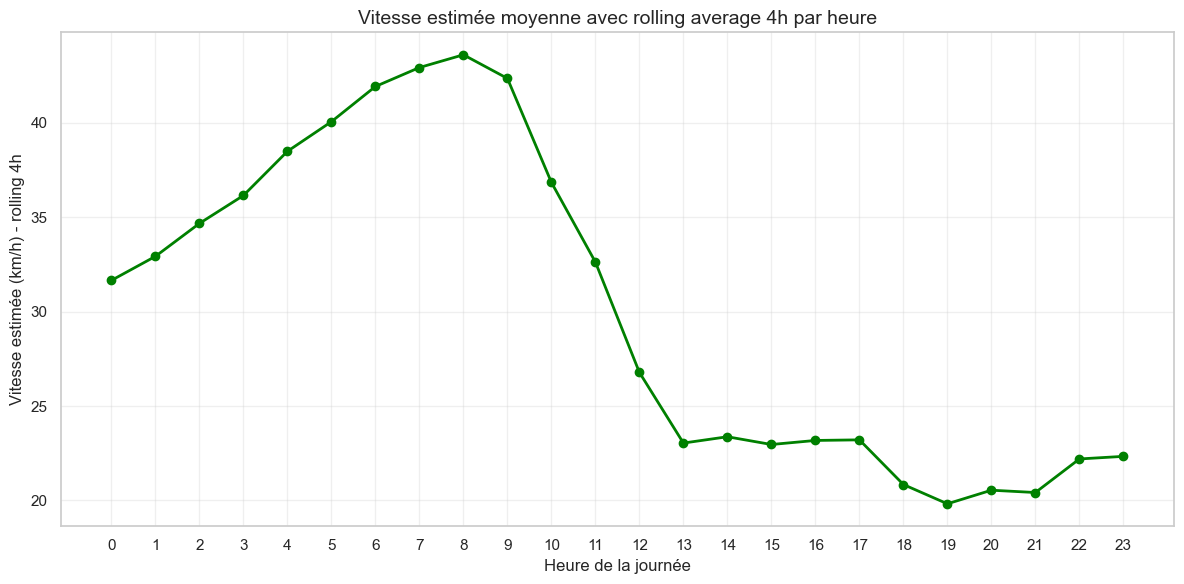


=== Statistiques vitesse estimée ===
Vitesse min : 19.82 km/h
Vitesse max : 43.60 km/h
Vitesse moyenne : 30.12 km/h


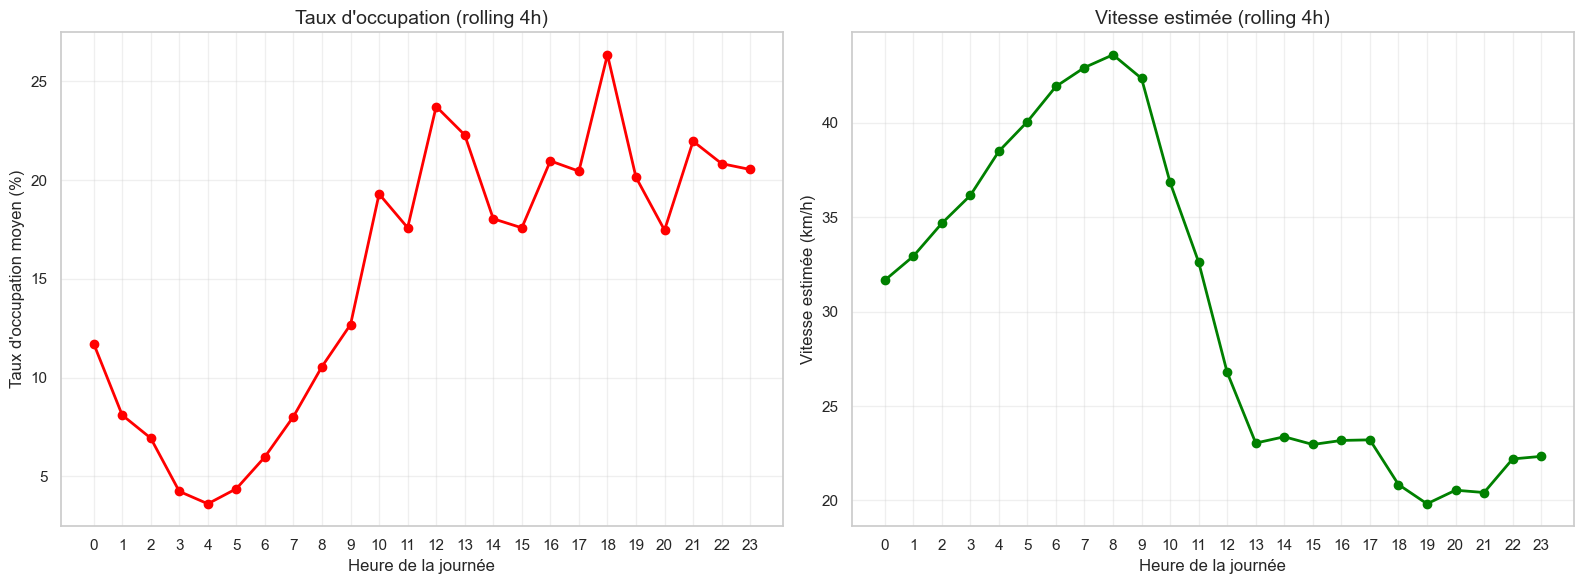

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_champs = df_champs_ori.copy()[-24:]

# Parse datetime and convert to timezone-naive
df_champs['datetime_temp'] = pd.to_datetime(df_champs['Date et heure de comptage'], utc=True)
df_champs['datetime_temp'] = df_champs['datetime_temp'].dt.tz_localize(None)

# Sort by datetime
df_champs = df_champs.sort_values('datetime_temp').reset_index(drop=True)

# Calculate estimated speed with calibration constant (1/2)
# On évite la division par zéro en remplaçant les taux d'occupation nuls/très faibles
df_champs['Taux_occup_safe'] = df_champs['Taux d\'occupation'].replace(0, np.nan)
df_champs['vitesse_estimee'] = (df_champs['Débit horaire'] / df_champs['Taux_occup_safe']) * 0.5

# Calculate 4-hour rolling average of estimated speed
df_champs['rolling_avg_vitesse_4h'] = df_champs['vitesse_estimee'].rolling(window=4, min_periods=1).mean()

# Extract hour
df_champs['hour'] = df_champs['datetime_temp'].dt.hour

# Group by hour and calculate the mean of the rolling average
hourly_avg_vitesse = df_champs.groupby('hour')['rolling_avg_vitesse_4h'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_vitesse.index, hourly_avg_vitesse.values, marker='o', linewidth=2, markersize=6, color='green')
plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Vitesse estimée (km/h) - rolling 4h', fontsize=12)
plt.title('Vitesse estimée moyenne avec rolling average 4h par heure', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Optionnel : afficher les statistiques
print("\n=== Statistiques vitesse estimée ===")
print(f"Vitesse min : {hourly_avg_vitesse.min():.2f} km/h")
print(f"Vitesse max : {hourly_avg_vitesse.max():.2f} km/h")
print(f"Vitesse moyenne : {hourly_avg_vitesse.mean():.2f} km/h")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Taux d'occupation
ax1.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6, color='red')
ax1.set_xlabel('Heure de la journée', fontsize=12)
ax1.set_ylabel('Taux d\'occupation moyen (%)', fontsize=12)
ax1.set_title('Taux d\'occupation (rolling 4h)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24))

# Vitesse estimée
ax2.plot(hourly_avg_vitesse.index, hourly_avg_vitesse.values, marker='o', linewidth=2, markersize=6, color='green')
ax2.set_xlabel('Heure de la journée', fontsize=12)
ax2.set_ylabel('Vitesse estimée (km/h)', fontsize=12)
ax2.set_title('Vitesse estimée (rolling 4h)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

# III. Sur l'année

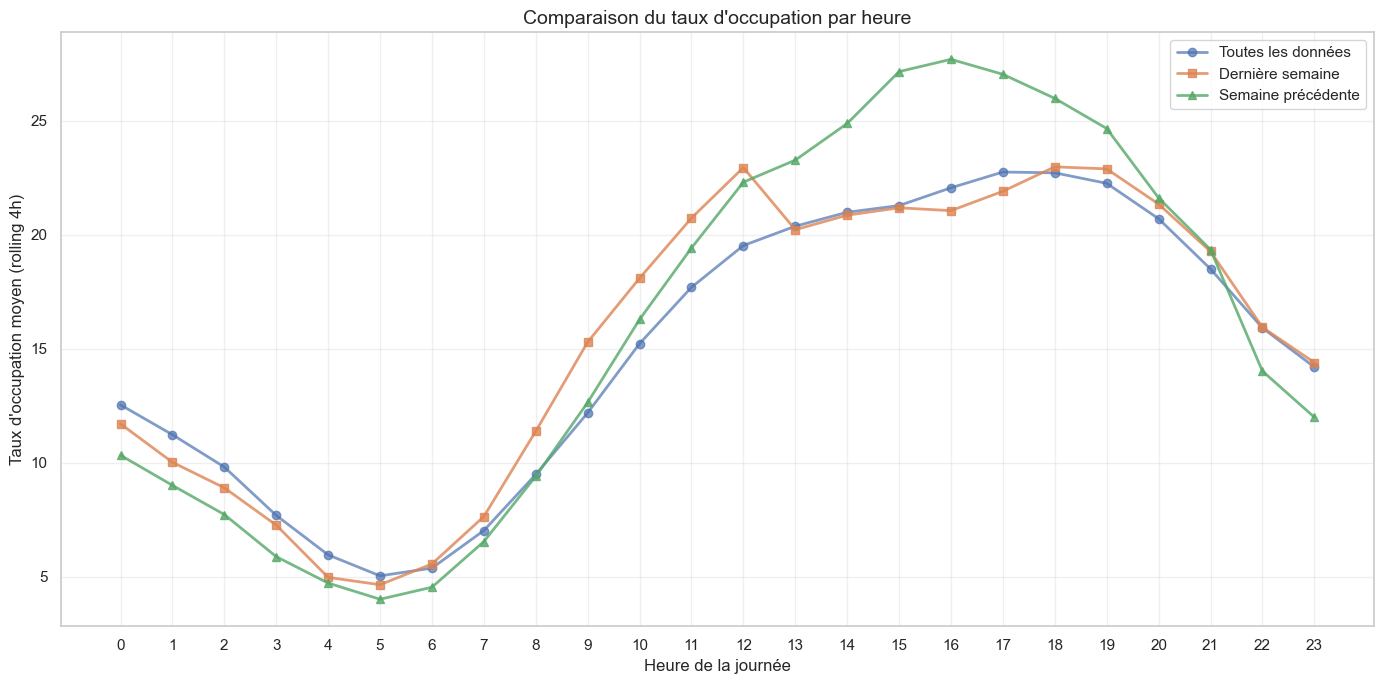

Période totale: 2025-03-22 16:00:00 à 2025-06-16 22:00:00
Dernière semaine: 2025-06-09 22:00:00 à 2025-06-16 22:00:00
Semaine précédente: 2025-06-02 22:00:00 à 2025-06-09 21:00:00


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Parse datetime and convert to timezone-naive
df_champs['datetime_temp'] = pd.to_datetime(df_champs['Date et heure de comptage'], utc=True)
df_champs['datetime_temp'] = df_champs['datetime_temp'].dt.tz_localize(None)

# Sort by datetime
df_champs = df_champs.sort_values('datetime_temp').reset_index(drop=True)

# Calculate 4-hour rolling average
df_champs['rolling_avg_4h'] = df_champs['Taux d\'occupation'].rolling(window=4, min_periods=1).mean()

# Extract hour
df_champs['hour'] = df_champs['datetime_temp'].dt.hour

# Get the most recent date in the dataset
max_date = df_champs['datetime_temp'].max()

# Define time periods
last_week = df_champs[df_champs['datetime_temp'] >= (max_date - pd.Timedelta(days=7))]
week_before = df_champs[(df_champs['datetime_temp'] >= (max_date - pd.Timedelta(days=14))) & 
                        (df_champs['datetime_temp'] < (max_date - pd.Timedelta(days=7)))]

# Calculate hourly averages for each period
hourly_avg_all = df_champs.groupby('hour')['rolling_avg_4h'].mean()
hourly_avg_last_week = last_week.groupby('hour')['rolling_avg_4h'].mean()
hourly_avg_week_before = week_before.groupby('hour')['rolling_avg_4h'].mean()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(hourly_avg_all.index, hourly_avg_all.values, 
         marker='o', linewidth=2, markersize=6, label='Toutes les données', alpha=0.7)
plt.plot(hourly_avg_last_week.index, hourly_avg_last_week.values, 
         marker='s', linewidth=2, markersize=6, label='Dernière semaine', alpha=0.8)
plt.plot(hourly_avg_week_before.index, hourly_avg_week_before.values, 
         marker='^', linewidth=2, markersize=6, label='Semaine précédente', alpha=0.8)

plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Taux d\'occupation moyen (rolling 4h)', fontsize=12)
plt.title('Comparaison du taux d\'occupation par heure', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Print date ranges for verification
print(f"Période totale: {df_champs['datetime_temp'].min()} à {df_champs['datetime_temp'].max()}")
print(f"Dernière semaine: {last_week['datetime_temp'].min()} à {last_week['datetime_temp'].max()}")
print(f"Semaine précédente: {week_before['datetime_temp'].min()} à {week_before['datetime_temp'].max()}")

In [37]:
df_champs = df_champs_ori[-1000:].copy()

Data type: datetime64[ns, UTC+02:00]
Sample values: 7603   2025-09-20 09:00:00+02:00
7604   2025-09-20 10:00:00+02:00
7605   2025-09-20 11:00:00+02:00
7606   2025-09-20 12:00:00+02:00
7607   2025-09-20 13:00:00+02:00
Name: Date et heure de comptage, dtype: datetime64[ns, UTC+02:00]


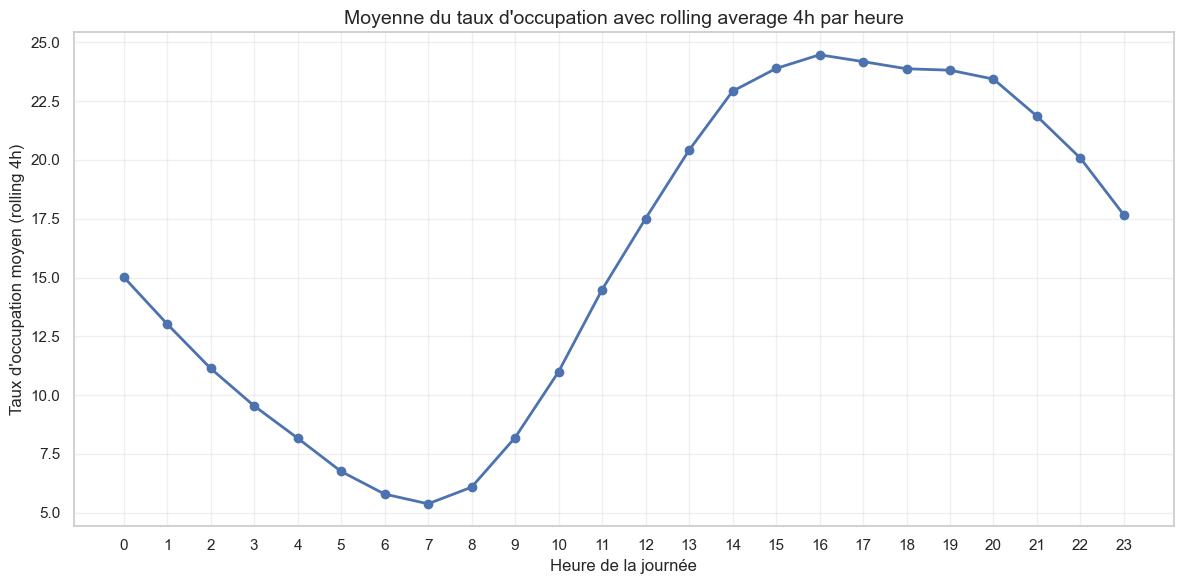

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert the date column to datetime with explicit format
df_champs['Date et heure de comptage'] = pd.to_datetime(
    df_champs['Date et heure de comptage'], 
    format='ISO8601',
    errors='coerce'
)

# Check if conversion worked
print("Data type:", df_champs['Date et heure de comptage'].dtype)
print("Sample values:", df_champs['Date et heure de comptage'].head())

# Remove any rows where datetime conversion failed
df_champs = df_champs.dropna(subset=['Date et heure de comptage'])

# Sort by datetime to ensure proper rolling calculation
df_champs = df_champs.sort_values('Date et heure de comptage')

# Calculate 4-hour rolling average
df_champs['rolling_avg_4h'] = df_champs['Taux d\'occupation'].rolling(window=4, min_periods=1).mean()

# Extract hour of the day
df_champs['hour'] = df_champs['Date et heure de comptage'].dt.hour

# Group by hour and calculate the mean of the rolling average
hourly_avg = df_champs.groupby('hour')['rolling_avg_4h'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6)
plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Taux d\'occupation moyen (rolling 4h)', fontsize=12)
plt.title('Moyenne du taux d\'occupation avec rolling average 4h par heure', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()